[*********************100%***********************]  1 of 1 completed
DatetimeIndex(['2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05',
               '2018-01-08'],
              dtype='datetime64[ns]', name='Date', freq=None)
Buy at the price 2713.06005859375
Sell at the price 3826.31005859375
[41.03300243847261]
The period is from 2018-01-02 00:00:00 up to 2021-02-02 00:00:00
Trades: 1
Total return: 41.03%
Average Gain: 41.03300243847261
Average Loss: 0
Max Return: 41.03300243847261
Max Loss: unknown
Gain/Loss Ratio: inf
Batting Average: 1.0
0.3392496000265328


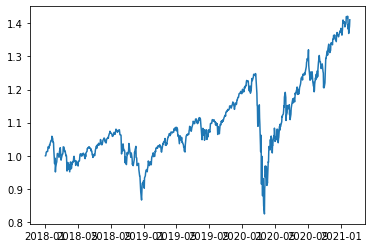

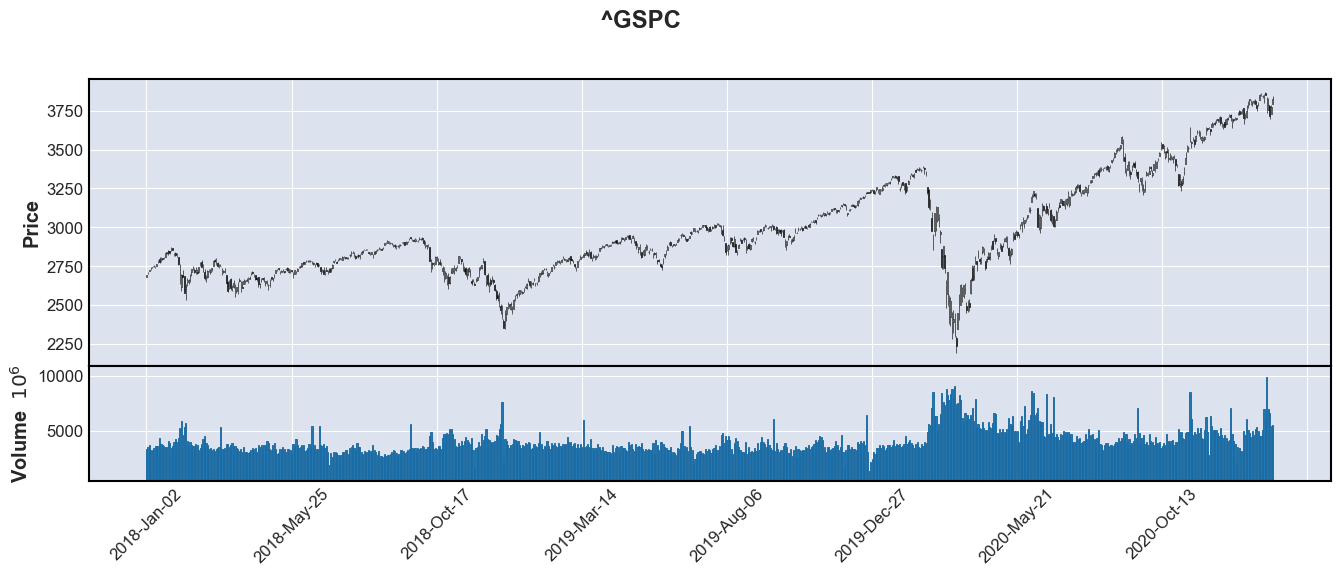

In [3]:
import numpy as np
import pandas as pd
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt
import mplfinance as mpf

"""
方針：初日に買い最終日まで保持し続けるプログラム
"""
start = '2018-01-01'
end = dt.datetime.now()
stock_code = '^GSPC'
df = yf.download(stock_code, start, end, interval='1d')


"""
メインループ
比較対象：最初の日に買って、最後の日に売る
"""

percentChange = []
counter = 1
print(df.index[:5])
assets = [1]

for i in range(1,len(df)):
#     print(counter)
#     print(counter,df.index[i])
#     print(buy_position, sell_position, buy_dates, sell_dates, buy_stopLine, sell_stopLine, 'Adj Close:{}'.format(df['Adj Close'][i]))
#     if counter == 100:
#         break
    close = df['Adj Close'][i]
    
    if i == 1:
        buy_price = close
        print('Buy at the price {}'.format(buy_price))
        
    if (counter == df['Adj Close'].count() - 1):
        percent = (close/buy_price - 1) * 100
        percentChange.append(percent)
        print('Sell at the price {}'.format(close))
    
    assets.append(1*(close/buy_price))
        
    counter += 1


print(percentChange)

# statistic
gains = 0
numGains = 0
losses = 0
numLosses = 0
total_return = 1

for i in percentChange:
    if i > 0:
        numGains += 1
        gains += i
    else:
        numLosses += 1
        losses += i
    total_return = total_return * ((i / 100) + 1)

total_return = round((total_return - 1)*100, 2)

if numGains > 0:
    average_gain = gains / numGains
    max_return = max(percentChange)
else:
    average_gain = 0
    max_return = 'unknown'
    
if numLosses > 0:
    average_loss = losses / numLosses
    max_loss = min(percentChange)
    risk_reward_retio = - average_gain / average_loss
else:
    average_loss = 0
    max_loss = 'unknown'
    risk_reward_retio = 'inf'
    
if numGains > 0 or numLosses > 0:
    batting_ratio = numGains / (numGains + numLosses)
else:
    batting_ratio = 0
    
print('The period is from {} up to {}'.format(df.index[0], df.index[-1]))
print('Trades: {}'.format(numGains+numLosses))
print('Total return: {}%'.format(total_return))
print('Average Gain: {}'.format(average_gain))
print('Average Loss: {}'.format(average_loss))
print('Max Return: {}'.format(max_return))
print('Max Loss: {}'.format(max_loss))
print('Gain/Loss Ratio: {}'.format(risk_reward_retio))
print('Batting Average: {}'.format(batting_ratio))

# 資産の計算とドローダウンの計算
assets = np.array(assets)
max_asset = 1
max_drawdown = 0
for i in range(len(assets)):
    max_asset = max(max_asset,assets[i])
    now_drawdown = 1 - (assets[i]/max_asset)
    if now_drawdown < 0:
        continue
    max_drawdown = max(max_drawdown, now_drawdown)  
print(max_drawdown)
# print(len(assets))
# print(assets.min())
# print('{}%'.format((round((1-assets.min())*100,2))))
plt.plot(df.index,assets)
plt.show()

fig, ax = mpf.plot(df,type='candle',figratio=(45,15),
                  volume=True, title=str(stock_code),returnfig=True)